# Analyse de l'expérience

In [1]:
import matplotlib.pyplot as plt

import math
import numpy as np
import pandas as pd
import sys

### Fonction courbe d'expérience

In [2]:
def lvlXpOverlord(lvl):
    i = 1
    xp = []
    lv = []
    xpLvl = [100, 200, 500, 1000, 2000, 4000, 8000]
    currentXp = 0
    while(i <= lvl):
        if i < 15 : 
            currentXp += xpLvl[0]
            xp.append(currentXp)
        elif i < 30 : 
            currentXp += xpLvl[1]
            xp.append(currentXp)
        elif i < 45 : 
            currentXp += xpLvl[2]
            xp.append(currentXp)
        elif i < 60 : 
            currentXp += xpLvl[3]
            xp.append(currentXp)
        elif i < 75 : 
            currentXp += xpLvl[4]
            xp.append(currentXp)
        elif i < 90 : 
            currentXp += xpLvl[5]
            xp.append(currentXp)
        else: 
            currentXp += xpLvl[6]
            xp.append(currentXp)
        lv.append(i)
        i += 1
    return xp, lv

def lvlXpLinear(lvl):
    i = 1
    xp = []
    lv = []
    while(i <= lvl):
        xp.append(round(i * math.log(40) * 100))
        lv.append(i)
        i += 1
    return xp, lv


def lvlXpExp(lvl):
    i = 1
    xp = []
    lv = []
    while(i <= lvl):
        xp.append(round(i * 100 * math.exp(i / 100)))
        lv.append(i)
        i += 1
    return xp, lv

def lvlXpExp2(lvl):
    i = 1
    xp = []
    lv = []
    y = 100
    while(i <= lvl):
        xp.append(round(y + i + (i * 5 * 1.3) ))
        lv.append(i)
        y = y + i + (i * 5 * 1.3)
        i += 1
    return xp, lv



### Fonction analyse gain d'experience

In [3]:
def calculXpGainByLvDiff(xpGain, lvl, zoneLvl):
    i = 1
    xp = []
    lv = []
    while(i < lvl):
        xp.append(max(0, round(xpGain + ( xpGain  * (zoneLvl + (i / 15) - i)) * 1.5 * math.exp(i / 100)) ))
        lv.append(i)
        i += 1
    return xp, lv

def calculXpGainByLvDiffVsPlayer(xpGain, lvlMax, deadLvl):
    i = 1
    xp = []
    lv = []
    xpGain /= 1000
    while(i < lvlMax):
        xp.append(max(0, round(( xpGain  * (deadLvl + (i / 4) - i)) * math.exp(i / 100)) ))
        lv.append(i)
        i += 1
    return xp, lv


# def calculXpGainByLvlPerMessage(xpGain, lvl):
#     i = 1
#     xp = []
#     lv = []
#     # y + x + (x * 5 * 1.3)
#     while(i < lvl):
#         xp.append(max(0, round(xpGain + ( xpGain  * (zoneLvl + (i / 4) - i)) * 1.5 * math.exp(i / 100)) ))
#         lv.append(i)
#         i += 1
#     return xp, lv

### Affichage des fonctions d'expérience

In [4]:
xpOverlord, lvlOverlord = lvlXpOverlord(100)
xpLinear, lvlLinear = lvlXpLinear(100)
xpExp, lvlExp = lvlXpExp(100)
xpExp2, lvlExp2 = lvlXpExp2(100)

i = 0
print("actuel \t\t\t linéaire \t\t exponentielle #1 \t exponentielle #2")
print("__________________________________________________________________________________________")
while i < 100:
    print("lvl : " + str(lvlOverlord[i]) + " = " + str(xpOverlord[i]) + "\t|\t" + "lvl : " + str(lvlLinear[i]) + " = " + str(xpLinear[i]) + "\t|\t" + "lvl : " + str(lvlExp[i]) + " = " + str(xpExp[i]) + "\t|\t" + "lvl : " + str(lvlExp2[i]) + " = " + str(xpExp2[i]))
    i+=1

actuel 			 linéaire 		 exponentielle #1 	 exponentielle #2
__________________________________________________________________________________________
lvl : 1 = 100	|	lvl : 1 = 369	|	lvl : 1 = 101	|	lvl : 1 = 108
lvl : 2 = 200	|	lvl : 2 = 738	|	lvl : 2 = 204	|	lvl : 2 = 122
lvl : 3 = 300	|	lvl : 3 = 1107	|	lvl : 3 = 309	|	lvl : 3 = 145
lvl : 4 = 400	|	lvl : 4 = 1476	|	lvl : 4 = 416	|	lvl : 4 = 175
lvl : 5 = 500	|	lvl : 5 = 1844	|	lvl : 5 = 526	|	lvl : 5 = 212
lvl : 6 = 600	|	lvl : 6 = 2213	|	lvl : 6 = 637	|	lvl : 6 = 258
lvl : 7 = 700	|	lvl : 7 = 2582	|	lvl : 7 = 751	|	lvl : 7 = 310
lvl : 8 = 800	|	lvl : 8 = 2951	|	lvl : 8 = 867	|	lvl : 8 = 370
lvl : 9 = 900	|	lvl : 9 = 3320	|	lvl : 9 = 985	|	lvl : 9 = 438
lvl : 10 = 1000	|	lvl : 10 = 3689	|	lvl : 10 = 1105	|	lvl : 10 = 512
lvl : 11 = 1100	|	lvl : 11 = 4058	|	lvl : 11 = 1228	|	lvl : 11 = 595
lvl : 12 = 1200	|	lvl : 12 = 4427	|	lvl : 12 = 1353	|	lvl : 12 = 685
lvl : 13 = 1300	|	lvl : 13 = 4796	|	lvl : 13 = 1480	|	lvl : 13 = 782
lvl : 14 

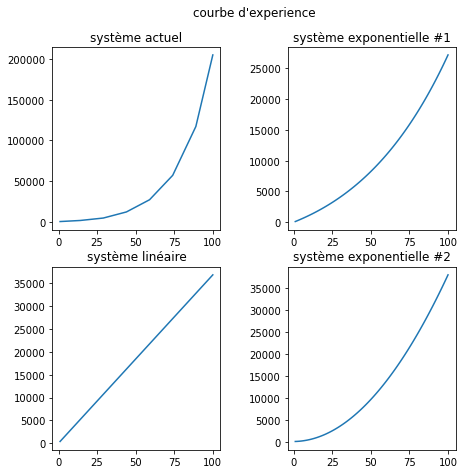

In [5]:
fig, axs = plt.subplots(2,2,figsize=(7,7))
fig.suptitle("courbe d'experience")
axs[0,0].set_title("système actuel")
axs[0,1].set_title("système exponentielle #1")
axs[1,0].set_title("système linéaire")
axs[1,1].set_title("système exponentielle #2")
axs[0,0].plot(lvlOverlord, xpOverlord)
axs[0,1].plot(lvlExp, xpExp)
axs[1,0].plot(lvlLinear, xpLinear)
axs[1,1].plot(lvlExp2, xpExp2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.2)

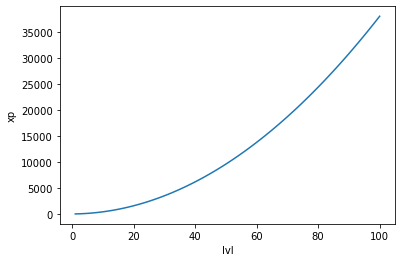

In [9]:
plt.plot(lvlExp2, xpExp2)
plt.xlabel('lvl')
plt.ylabel('xp')
plt.show()

### Affichage fonction d'analyse de gain 

In [7]:
xpGain, lvlGain = calculXpGainByLvDiff(15,100,20)
xpGain1, lvlGain1 = calculXpGainByLvDiff(15,100,100)
xpGain2, lvlGain2 = calculXpGainByLvDiffVsPlayer(37975,100,100)
i = 0
print("15 xp, lvlMob : 20 \t 30xp, lvlMob : 25 \t 100xp, lvlMob : 40")
print("_______________________________________________________________")
while i < 99:
    print("lvl : " + str(lvlGain[i]) + " = " + str(xpGain[i]) + "\t | \t" + "lvl : " + str(lvlGain1[i]) + " = " + str(xpGain1[i]) + "\t | \t" + "lvl : " + str(lvlGain2[i]) + " = " + str(xpGain2[i]) + "\t | \t"  )
    i +=1

15 xp, lvlMob : 20 	 30xp, lvlMob : 25 	 100xp, lvlMob : 40
_______________________________________________________________
lvl : 1 = 448	 | 	lvl : 1 = 2266	 | 	lvl : 1 = 3807	 | 	
lvl : 2 = 431	 | 	lvl : 2 = 2268	 | 	lvl : 2 = 3816	 | 	
lvl : 3 = 414	 | 	lvl : 3 = 2269	 | 	lvl : 3 = 3825	 | 	
lvl : 4 = 396	 | 	lvl : 4 = 2269	 | 	lvl : 4 = 3834	 | 	
lvl : 5 = 378	 | 	lvl : 5 = 2270	 | 	lvl : 5 = 3842	 | 	
lvl : 6 = 359	 | 	lvl : 6 = 2270	 | 	lvl : 6 = 3851	 | 	
lvl : 7 = 340	 | 	lvl : 7 = 2270	 | 	lvl : 7 = 3859	 | 	
lvl : 8 = 320	 | 	lvl : 8 = 2270	 | 	lvl : 8 = 3867	 | 	
lvl : 9 = 301	 | 	lvl : 9 = 2270	 | 	lvl : 9 = 3875	 | 	
lvl : 10 = 280	 | 	lvl : 10 = 2270	 | 	lvl : 10 = 3882	 | 	
lvl : 11 = 259	 | 	lvl : 11 = 2269	 | 	lvl : 11 = 3889	 | 	
lvl : 12 = 238	 | 	lvl : 12 = 2268	 | 	lvl : 12 = 3896	 | 	
lvl : 13 = 217	 | 	lvl : 13 = 2266	 | 	lvl : 13 = 3903	 | 	
lvl : 14 = 194	 | 	lvl : 14 = 2265	 | 	lvl : 14 = 3910	 | 	
lvl : 15 = 172	 | 	lvl : 15 = 2263	 | 	lvl : 15 = 3916	 | 	
lvl

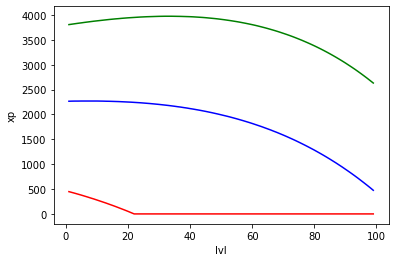

In [8]:
plt.plot(lvlGain, xpGain, "red", lvlGain1, xpGain1, "blue", lvlGain2, xpGain2, "green")
plt.xlabel('lvl')
plt.ylabel('xp')
plt.show()